RMSE:  0,1781174

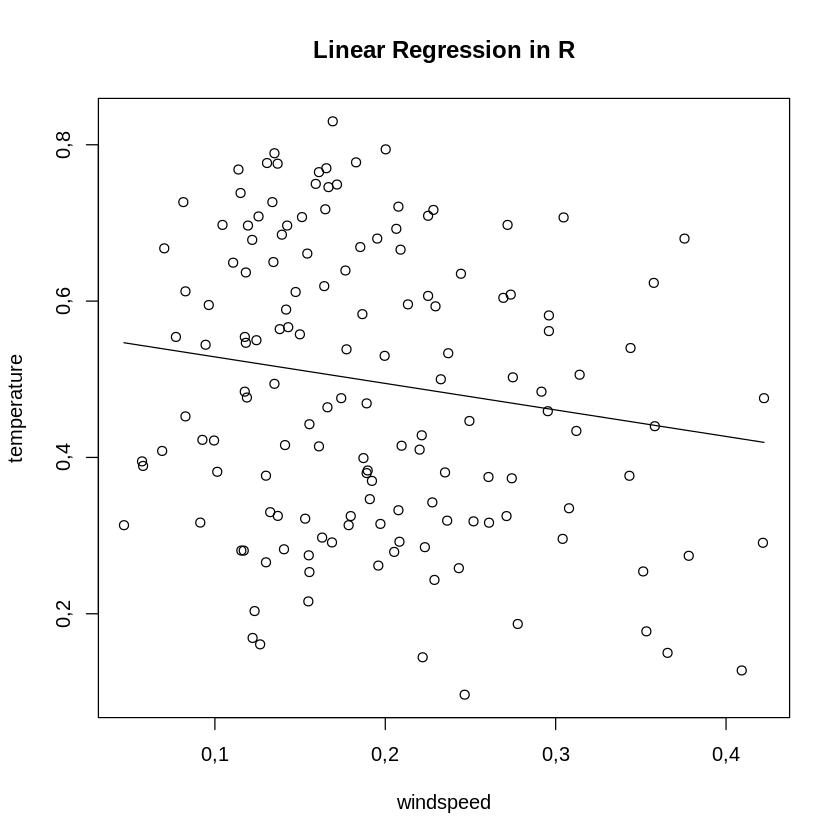

In [2]:
#Turn dataframe to array
turnToArray <- function(DF){
  return(data.matrix(DF))
}

graph_solution <- function(x,y,pred){
  plot(x, y, xlab = "windspeed", ylab = "temperature")
  title("Linear Regression in R")
  lines(x, pred)
}

#Calculate the variance of a list of numbers
variance <- function(values,mean_val){
  result <-0
  for(x in values){
    result<-result + (x-mean_val)**2
  }
  return(result)
}

#Calculate the covariance from two groups of numbers
#Covariance --> describes how those numbers change together
covariance <- function(values_x,values_y,mean_x,mean_y){
  if(length(values_x)!=length(values_y)){
    stop("Groups must have same dimensions.")
  }
  result<-0
  for(i in 1:length(values_x)){
    result <- result + (values_x[i]-mean_x) * (values_y[i]-mean_y)
  }
  return(result)
}
#Calculate coefficients
coefficients<- function(dataset){
  x_data <- c()
  y_data <- c()
  
  for(i in 1:length(dataset)){
    x_data<-c(x_data,dataset[[i]][[1]])
    y_data<-c(y_data,dataset[[i]][[2]])
  }
  
  b1<-covariance(x_data,y_data,mean(x_data),mean(y_data)) / variance(x_data,mean(x_data))
  b0<-mean(y_data) - b1 * mean(x_data)
  
  return(c(b0,b1))
}

#Calculate the root mean square error
rmse_metric<-function(y,predictions){
  sum_error<-0.0
  
  if(length(y)!= length(predictions)) {
    stop("Groups must have same dimensions.")
  }
  for(i in 1:length(y)){
    pred_err<- y[[i]] - predictions[[i]]
    sum_error<- sum_error + pred_err**2
  }
  mean_err<- sum_error / length(y)
  return(sqrt(mean_err))
}

#Linear regression algorithm and testing
simple_linear_regression <- function(train,test){
  predictions<-list()
  args <- coefficients(train)
  b0<-args[1]
  b1<-args[2]
  
  for (i in test){
    pred_y<- b0 + b1 *i
    predictions<-append(predictions,pred_y)
  }
  return(predictions)
}

evaluate_algorithm<-function(dataset, split){
  train_set <- list()
  train_size <- as.integer(split*length(dataset))
  
  while(length(train_set)<train_size){
    random_index<-as.integer(runif(1,1,length(dataset)))
    train_set<-append(train_set,dataset[random_index])
    dataset<-dataset[-random_index]
  }
  
  test_x <- list()
  test_y <- list()
  
  for (i in 1:length(dataset)){
    test_x<-append(test_x,dataset[[i]][[1]])
    test_y<-append(test_y,dataset[[i]][[2]])
  } 
  
  predicted<- simple_linear_regression(train_set,test_x)
  
  #graph
  graph_solution(test_x, test_y, predicted)
  
  #print(actual,predicted)
  rmse<- rmse_metric(test_y, predicted)
  return (rmse)
}

setwd("~/ML_algorithms/linear_regression")
#Read from csv
data <- read.csv(file="day.csv")

label <- turnToArray(data['temp'])
feature <- turnToArray((data['windspeed']))

split<- 0.8
dataset<- list()

for(i in 1:length(feature)){
  dataset[[i]]<- c(feature[i],label[i])
}

rmse<- evaluate_algorithm(dataset,split)
cat('RMSE: ',rmse)